In [1]:
# !pip install textblob 
# !pip install scikit-learn
# !pip install gensim
# !pip install nltk
# !pip install seaborn
# !pip install matplotlib
# !pip install skfeature-chappers

In [ ]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from textblob import TextBlob 
import numpy as np
import re
import nltk
nltk.download('stopwords')

# from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.porter import PorterStemmer
from gensim.utils import tokenize

from nltk.corpus import stopwords
stopwords = [word for word in stopwords.words('english')]


from sklearn.model_selection import train_test_split
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# stopwords

In [ ]:
# url = "Data/all_brands_export.csv"
# da=pd.read_csv(url)

In [ ]:
# import pandas as pd
# url = "Data/all_brands.csv"
# db=pd.read_csv(url)

In [ ]:
# db

In [ ]:
# da

In [ ]:
# da["review"][0].split(',')[0]

In [ ]:
url = "Data/acer-phones_export.csv"
db=pd.read_csv(url,sep = ';')
# txt=db["review"][0].split('.')[0]
# tokenize_sentence(txt)
db


In [ ]:


# reviews = np.array(da["review"])
reviews = np.array(db["review"])
myDict = {}
list_ = []
count = 0
super_list = []
for sent in reviews:

    temp= []
    try:
        temp = list(sent.split(","))
        super_list.append(temp)

    except:
        super_list.append(None)


In [ ]:
def pre_process(sentence):  
# print(type(stopwords))


    # Remove all the special characters
    processed_sentence = re.sub(r'\W', ' ', str(sentence))

    # remove all single characters
    processed_sentence = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_sentence)

    # Remove single characters from the start
    processed_sentence= re.sub(r'\^[a-zA-Z]\s+', ' ', processed_sentence) 

    # Substituting multiple spaces with single space
    processed_sentence= re.sub(r'\s+', ' ', processed_sentence, flags=re.I)

    # Removing prefixed 'b'
    processed_sentence = re.sub(r'^b\s+', '', processed_sentence)
    
   
    return processed_sentence


In [ ]:
def updated_sentence(sentence): 
    sentence = sentence.lower()
    new = " "
    p = PorterStemmer()
    # print("before remove stopward : ",sentence)
    processed = pre_process(sentence)
    # print("processed : " ,processed)
    stemmed = p.stem(processed)
    # print(stemmed)
    tokens = tokenize(stemmed.strip())
    lst=list(tokens)
    lst2 = []
    for i in lst:
        #using nltk dic for stopwords
        if  i not in stopwords :
            lst2.append(i)
    return (new.join(lst2))

In [ ]:
def polarity_scaling(polarity):
    # 0  nutral
    if polarity  == 0:
        return 0
    # greater then 0  positive
    elif polarity > 0:
        return 1
    else:
        # less then 0  negative
        return -1    

In [1494]:
def reviews_list_polarity():
    individual_review = []
    for_reviews = []
    for_polarity = []
    updated_review_Dict = {}
    super_list_2 = []
#     print(super_list)
    for remove_none_type in super_list:
        if remove_none_type is not None:
            super_list_2.append(remove_none_type)
#             print(super_list_2)
    for select_list in super_list_2:
        for i in select_list:
            news =i.strip()
            new1=news.split(".")

            lst_list = []
            lst_list_2 = []


            for j in new1:
                j = updated_sentence(j)
                temp =j.replace("\r\n" ,"")
                # print(temp)
                pol = TextBlob(temp).sentiment.polarity
                polarity=polarity_scaling(pol)
                tup = (temp ,polarity)
                lst_list.append(tup)
            # print(lst[0])
                # lst_list[:-1]
            for remove_tuple in lst_list:
                if remove_tuple != ('',0):
                    lst_list_2.append(remove_tuple)
#             print(lst_list_2[0][0])
            if lst_list_2 != []:
                for_reviews.append(lst_list_2[0][0])
                for_polarity.append(lst_list_2[0][1])
            
            # individual_review.append(lst_list_2)
    updated_review_Dict["reviews"]=for_reviews
    updated_review_Dict["polarity"]=for_polarity
    
           
            # print(lst_list)
            # individual_review.append(lst_list)

    # return updated_review_Dict["reviews"],updated_review_Dict["polarity"]
    return updated_review_Dict
    # return individual_review
# reviews_list_polarity()

In [1495]:
data=pd.DataFrame(reviews_list_polarity())
#spiting data for train data
x = data['reviews']
y = data['polarity']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [1496]:
# Vectorize text reviews to numbers
vec = CountVectorizer()
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()
# print(x_test)

In [1497]:
NB_model = MultinomialNB()
NB_model.fit(x, y)

MultinomialNB()

In [1498]:
# FOr data train too
# train_pred = NB_model.predict(x)

# train_pred

In [1499]:
#  to see  training data differnce
# cf_train_matrix = confusion_matrix(y,train_pred)
# cf_train_matrix
# print(cf_train_matrix)
# print(classification_report(y,train_pred))
# print(accuracy_score(y,train_pred))

In [1500]:
y_pred = NB_model.predict(x_test)
y_pred

array([ 0,  1,  0,  1,  0,  0,  1,  0, -1,  0,  0,  1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  0,  1,  0,  0,  0,  1,  0,
        1,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  1,  0,  1,  0,  0, -1,
        1,  0,  0,  0,  0,  1,  1,  0,  0,  1, -1,  0,  0,  0,  1,  1,  0,
        1, -1,  0,  0,  0,  1,  0,  0,  0,  0,  1, -1,  0, -1,  0, -1,  1,
        0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  0,  0,  1, -1, -1,  0,
        0,  0,  1, -1,  1,  0,  0,  0,  0,  1,  1,  0, -1,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0, -1,  1, -1,  1,  0,  0,  0,  1,  0,  1,
        1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  1,  0, -1,  1,  1,  0, -1,
        0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  1,  1, -1,
        0,  0,  0,  1,  0,  0,  1, -1,  1,  0,  0,  0,  1,  0,  1, -1,  1,
        0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  1,  0,  0,  1,  1,  0,
        0, -1,  0,  0,  1

In [1501]:
cf_matrix = confusion_matrix(y_test,y_pred)
# cf_matrix
print("Naive Bayes Matrix , accuracy and f1-score\n\n")
print("NB confussion matrix : \n",cf_matrix)

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))


Naive Bayes Matrix , accuracy and f1-score


NB confussion matrix : 
 [[ 38  20  10]
 [  3 245  16]
 [  5  26 102]]
              precision    recall  f1-score   support

          -1       0.83      0.56      0.67        68
           0       0.84      0.93      0.88       264
           1       0.80      0.77      0.78       133

    accuracy                           0.83       465
   macro avg       0.82      0.75      0.78       465
weighted avg       0.83      0.83      0.82       465

0.8279569892473119


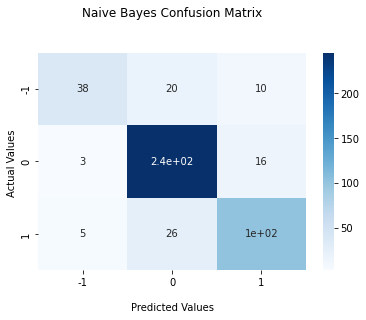

In [1502]:


ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Naive Bayes Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['-1','0','1'])
ax.yaxis.set_ticklabels(['-1','0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()



Naive Bayes Matrix , accuracy and f1-score


NB confussion matrix : 
 [[ 38  20  10]
 [  3 245  16]
 [  5  26 102]]
              precision    recall  f1-score   support

          -1       0.83      0.56      0.67        68
           0       0.84      0.93      0.88       264
           1       0.80      0.77      0.78       133

    accuracy                           0.83       465
   macro avg       0.82      0.75      0.78       465
weighted avg       0.83      0.83      0.82       465

0.8279569892473119






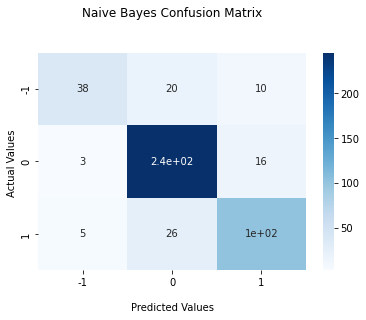

In [1503]:
def NB_training_testing():
    data=pd.DataFrame(reviews_list_polarity())
    #spiting data for train data
    x_train = data['reviews']
    y_train = data['polarity']
    x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, stratify=y_train, test_size=0.25, random_state=42)
    
    # Vectorize text reviews to numbers
    vec = CountVectorizer()
    x_train = vec.fit_transform(x_train).toarray()
    x_test = vec.transform(x_test).toarray()
    # print(x_test)
    #train model
    NB_model = MultinomialNB()
    NB_model.fit(x_train, y_train)
    #prediction on test
    y_pred = NB_model.predict(x_test)
    # confusion matric and report and accurcy
    print("\n")
    NB_cf_matrix = confusion_matrix(y_test,y_pred)
    # cf_matrix
    print("Naive Bayes Matrix , accuracy and f1-score\n\n")
    print("NB confussion matrix : \n",NB_cf_matrix)

    print(classification_report(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))
    print("\n")
    print("\n")
    # NB_model.score(x_test, y_test)
    #plot 
    
    ax = sns.heatmap(NB_cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Naive Bayes Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['-1','0','1'])
    ax.yaxis.set_ticklabels(['-1','0','1'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

NB_training_testing()

In [1504]:
# labels = ['True Neg','False nutral','False pos',
#           'False Neg','True nutral','False pos',
#           'False Neg','False nutral','True pos',
#          ]
# labels = np.asarray(labels).reshape(3,3)
# sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [1505]:
NB_model.score(x_test, y_test)

0.8279569892473119




SVM Model Train and testing




SVM confusion Matrix , accuracy and f1-score


SVM confusion Matrix : 
 [[ 57  11   0]
 [  3 257   4]
 [  4  25 104]]
              precision    recall  f1-score   support

          -1       0.89      0.84      0.86        68
           0       0.88      0.97      0.92       264
           1       0.96      0.78      0.86       133

    accuracy                           0.90       465
   macro avg       0.91      0.86      0.88       465
weighted avg       0.90      0.90      0.90       465

0.8989247311827957


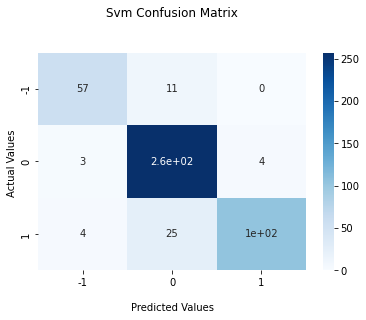

In [1506]:
def SVM_training_testing():
    data=pd.DataFrame(reviews_list_polarity())
    #spiting data for train data
    x_train = data['reviews']
    y_train = data['polarity']
    x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, stratify=y_train, test_size=0.25, random_state=42)
    
    # Vectorize text reviews to numbers
    vec = CountVectorizer()
    x_train = vec.fit_transform(x_train).toarray()
    x_test = vec.transform(x_test).toarray()
    # print(x_test)
    #train model
    svm_model = SVC(kernel='linear')       #kernal linear
    svm_model.fit(x_train, y_train)
    #prediction
    svm_pred = svm_model.predict(x_test)
    svm_cf_matrix = confusion_matrix(y_test,svm_pred)
    # svm_cf_matrix
    print("SVM confusion Matrix , accuracy and f1-score\n\n")
    print("SVM confusion Matrix : \n",svm_cf_matrix)

    print(classification_report(y_test,svm_pred))
    print(accuracy_score(y_test,svm_pred))
    
    # svm_model.score(x_test, y_test)
    
    ax = sns.heatmap(svm_cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Svm Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['-1','0','1'])
    ax.yaxis.set_ticklabels(['-1','0','1'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    
SVM_training_testing()
    

In [1507]:
svm_model = SVC(kernel='linear')
svm_model.fit(x, y)

SVC(kernel='linear')

In [1508]:

svm_pred = svm_model.predict(x_test)
svm_pred


array([ 0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0, -1,
        0,  1,  0,  0,  0,  1,  0,  0,  1,  1,  0,  1,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  1,  1,  0,  1,  0,  0,  1,  0,  1, -1,  0,  0,
        1,  0,  0,  0,  0, -1, -1,  0,  0,  1, -1,  0,  0,  0,  0,  1,  0,
        1, -1,  0,  0,  0,  1,  0,  0,  0,  0,  1, -1,  0, -1,  0, -1,  1,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  1,  0,  0,  0, -1,  0,  1,  0,  1,  1,  0,  0,  0,  0, -1,  0,
        0,  0,  1, -1, -1,  0,  0,  0,  0,  1, -1,  0, -1,  0,  1,  0,  1,
        0,  0,  0,  0,  0,  0,  0, -1,  1, -1, -1,  0,  0,  0,  1,  0,  1,
        1,  0,  0,  0,  1,  0,  0, -1,  0,  0,  0,  0, -1,  1,  1,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  1,  1,  0,
        0,  0,  0, -1,  0, -1,  1, -1, -1, -1,  0,  0,  1,  0,  1, -1,  1,
        0, -1,  0,  0, -1,  1,  0,  1,  0,  0,  0,  1,  0,  0,  1,  1,  0,
        0, -1,  0,  0,  1

In [1509]:
svm_cf_matrix = confusion_matrix(y_test,svm_pred)
# cf_matrix
print("SVM confusion Matrix , accuracy and f1-score\n\n")
print("SVM confusion Matrix : \n",svm_cf_matrix)

print(classification_report(y_test,svm_pred))
print(accuracy_score(y_test,svm_pred))

SVM confusion Matrix , accuracy and f1-score


SVM confusion Matrix : 
 [[ 57  11   0]
 [  3 257   4]
 [  4  25 104]]
              precision    recall  f1-score   support

          -1       0.89      0.84      0.86        68
           0       0.88      0.97      0.92       264
           1       0.96      0.78      0.86       133

    accuracy                           0.90       465
   macro avg       0.91      0.86      0.88       465
weighted avg       0.90      0.90      0.90       465

0.8989247311827957


In [1510]:
svm_model.score(x_test, y_test)

0.8989247311827957

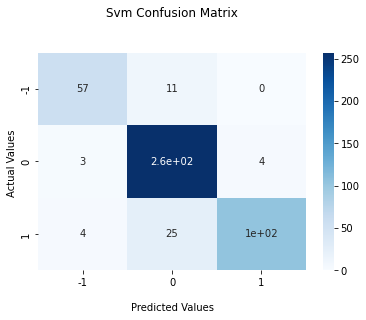

In [1511]:
ax = sns.heatmap(svm_cf_matrix, annot=True, cmap='Blues')

ax.set_title('Svm Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['-1','0','1'])
ax.yaxis.set_ticklabels(['-1','0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [1514]:
# from skfeature.function.similarity_based import fisher_score
# ranks  = fisher_score.fisher_score(x,y)
# feat = pd.Series(ranks , data.columns[0:len(data.columns)-1])
# feat.plot(kind = 'barh' ,color = 'teal')

In [1515]:
# data.columns[0:len(data.columns)-1]

SVM confusion Matrix , accuracy and f1-score


SVM confusion Matrix : 
 [[  5  63   0]
 [  0 264   0]
 [  0 127   6]]
              precision    recall  f1-score   support

          -1       1.00      0.07      0.14        68
           0       0.58      1.00      0.74       264
           1       1.00      0.05      0.09       133

    accuracy                           0.59       465
   macro avg       0.86      0.37      0.32       465
weighted avg       0.76      0.59      0.46       465

0.5913978494623656


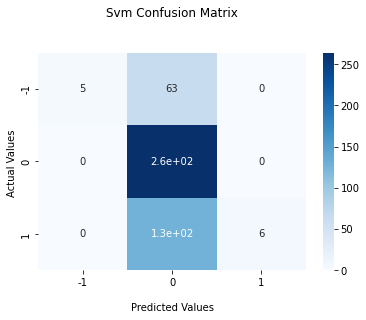

In [1516]:
  #kernal polynomial
def SVM_training_testing():
    data=pd.DataFrame(reviews_list_polarity())
    #spiting data for train data
    x_train = data['reviews']
    y_train = data['polarity']
    x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, stratify=y_train, test_size=0.25, random_state=42)
    
    # Vectorize text reviews to numbers
    vec = CountVectorizer()
    x_train = vec.fit_transform(x_train).toarray()
    x_test = vec.transform(x_test).toarray()
    # print(x_test)
    #train model
    svm_model = SVC(kernel='poly',degree =8)       #kernal polynomial
    svm_model.fit(x_train, y_train)
    #prediction
    svm_pred = svm_model.predict(x_test)
    svm_cf_matrix = confusion_matrix(y_test,svm_pred)
    # svm_cf_matrix
    print("SVM confusion Matrix , accuracy and f1-score\n\n")
    print("SVM confusion Matrix : \n",svm_cf_matrix)

    print(classification_report(y_test,svm_pred))
    print(accuracy_score(y_test,svm_pred))
    
    # svm_model.score(x_test, y_test)
    
    ax = sns.heatmap(svm_cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Svm Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['-1','0','1'])
    ax.yaxis.set_ticklabels(['-1','0','1'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    
SVM_training_testing()
    
    

SVM confusion Matrix , accuracy and f1-score


SVM confusion Matrix : 
 [[ 24  38   6]
 [  0 260   4]
 [  0  49  84]]
              precision    recall  f1-score   support

          -1       1.00      0.35      0.52        68
           0       0.75      0.98      0.85       264
           1       0.89      0.63      0.74       133

    accuracy                           0.79       465
   macro avg       0.88      0.66      0.70       465
weighted avg       0.83      0.79      0.77       465

0.7913978494623656


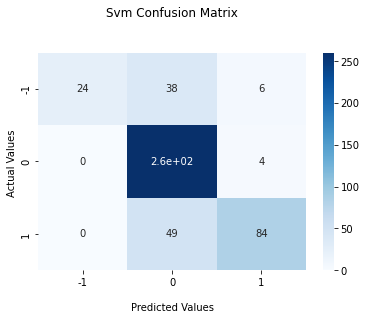

In [1517]:
def SVM_training_testing():
    data=pd.DataFrame(reviews_list_polarity())
    #spiting data for train data
    x_train = data['reviews']
    y_train = data['polarity']
    x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, stratify=y_train, test_size=0.25, random_state=42)
    
    # Vectorize text reviews to numbers
    vec = CountVectorizer()
    x_train = vec.fit_transform(x_train).toarray()
    x_test = vec.transform(x_test).toarray()
    # print(x_test)
    #train model
    svm_model = SVC(kernel='rbf')       #kernal Gaussian
    svm_model.fit(x_train, y_train)
    #prediction
    svm_pred = svm_model.predict(x_test)
    svm_cf_matrix = confusion_matrix(y_test,svm_pred)
    # svm_cf_matrix
    print("SVM confusion Matrix , accuracy and f1-score\n\n")
    print("SVM confusion Matrix : \n",svm_cf_matrix)

    print(classification_report(y_test,svm_pred))
    print(accuracy_score(y_test,svm_pred))
    
    # svm_model.score(x_test, y_test)
    
    ax = sns.heatmap(svm_cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Svm Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['-1','0','1'])
    ax.yaxis.set_ticklabels(['-1','0','1'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    
SVM_training_testing()
    

SVM confusion Matrix , accuracy and f1-score


SVM confusion Matrix : 
 [[ 34  32   2]
 [  2 261   1]
 [  1  43  89]]
              precision    recall  f1-score   support

          -1       0.92      0.50      0.65        68
           0       0.78      0.99      0.87       264
           1       0.97      0.67      0.79       133

    accuracy                           0.83       465
   macro avg       0.89      0.72      0.77       465
weighted avg       0.85      0.83      0.81       465

0.8258064516129032


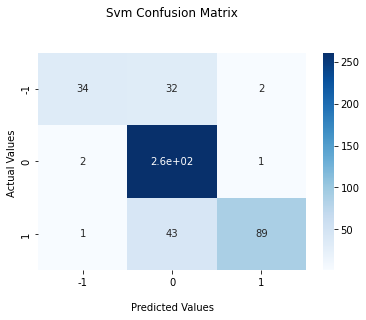

In [1518]:
def SVM_training_testing():
    data=pd.DataFrame(reviews_list_polarity())
    #spiting data for train data
    x_train = data['reviews']
    y_train = data['polarity']
    x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, stratify=y_train, test_size=0.25, random_state=42)
    
    # Vectorize text reviews to numbers
    vec = CountVectorizer()
    x_train = vec.fit_transform(x_train).toarray()
    x_test = vec.transform(x_test).toarray()
    # print(x_test)
    #train model
    svm_model = SVC(kernel='sigmoid')       #kernal Gaussian
    svm_model.fit(x_train, y_train)
    #prediction
    svm_pred = svm_model.predict(x_test)
    svm_cf_matrix = confusion_matrix(y_test,svm_pred)
    # svm_cf_matrix
    print("SVM confusion Matrix , accuracy and f1-score\n\n")
    print("SVM confusion Matrix : \n",svm_cf_matrix)

    print(classification_report(y_test,svm_pred))
    print(accuracy_score(y_test,svm_pred))
    
    # svm_model.score(x_test, y_test)
    
    ax = sns.heatmap(svm_cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Svm Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['-1','0','1'])
    ax.yaxis.set_ticklabels(['-1','0','1'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    
SVM_training_testing()

In [1519]:
from sklearn import model_selection

In [1520]:
seed = 7
kfold = model_selection.KFold(n_splits=10, shuffle =True, random_state = seed)

estimators = []
model1 = svm_model
estimators.append(('svm', model1))
model2 = NB_model
estimators.append(('cart', model2))

ensemble = VotingClassifier(estimators , voting = 'hard')
results = model_selection.cross_val_score(ensemble, x, y, cv=kfold)
print("Ensemble result",results.mean())

Ensemble result 0.8333144912641316
